In [1]:
#Import the data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
#Read the csv files
questions_python = pd.read_csv("Resources/Questions.csv", encoding = "iso-8859-1")
answers_python = pd.read_csv("Resources/Answers.csv", encoding = 'iso-8859-1')
tags_python = pd.read_csv("Resources/Tags.csv", encoding = 'iso-8859-1')

In [3]:
#Clean up the Data Frames
#Since we can't fully read the Title or the Body of the text from the DF,
#atually, we don't need the Title and Body of the text 
#I just remove them to make the data frames cleaner 
#And we will be working with the clean Data Frames from now on

clean_questions_python = questions_python[['Id','OwnerUserId', 'CreationDate',
                                           'Score','Title']]
clean_answers_python = answers_python[['Id','OwnerUserId','ParentId','CreationDate',
                                       'Score']]
clean_questions_python.head()

,Id,OwnerUserId,CreationDate,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [4]:
#Sort Questions by ID
sort_questions = clean_questions_python.sort_values(ascending=True, by = 'Id')
#Sort Answers by ID
sort_answers = clean_answers_python.sort_values(ascending=True, by = 'Id')
#Sort Tags by ID 
sort_tags = tags_python.sort_values(ascending=True, by = 'Id')

In [5]:
#Convert date into numerical value for both Questions and Answers DF 
clean_questions_python['CreationDate'] = pd.to_datetime(questions_python['CreationDate'])
clean_answers_python['CreationDate'] = pd.to_datetime(answers_python['CreationDate'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#Rename the columns' names to make it looks better
sort_python_questions = sort_questions.rename(columns={'CreationDate': "Questions' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_answers = sort_answers.rename(columns={'CreationDate': "Answers' Creation Date",
                                                      'OwnerUserId': "Owner's User Id"})
sort_python_questions.head()

,Id,Owner's User Id,Questions' Creation Date,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [7]:
sort_python_answers.head()

,Id,Owner's User Id,ParentId,Answers' Creation Date,Score
0,497,50.0,469,2008-08-02T16:56:53Z,4
1,518,153.0,469,2008-08-02T17:42:28Z,2
2,536,161.0,502,2008-08-02T18:49:07Z,9
3,538,156.0,535,2008-08-02T18:56:56Z,23
4,541,157.0,535,2008-08-02T19:06:40Z,20


In [8]:
#Merge answers and questions and tags into a single DF

merge_questions_answers = sort_python_answers.merge(sort_python_questions, left_on = 'ParentId', right_on = 'Id', suffixes = ['(Answers)' , '(Questions)'])
merge_all = sort_tags.join(merge_questions_answers)
merge_all.head()

#questions_python.dtypes

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title
0,469,python,497.0,50.0,469.0,2008-08-02T16:56:53Z,4.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
1,469,osx,518.0,153.0,469.0,2008-08-02T17:42:28Z,2.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
2,469,fonts,3040.0,457.0,469.0,2008-08-06T03:01:23Z,12.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
3,469,photoshop,195170.0,745.0,469.0,2008-10-12T07:02:40Z,1.0,469.0,147.0,2008-08-02T15:11:16Z,21.0,How can I find the full path to a font from it...
4,502,python,536.0,161.0,502.0,2008-08-02T18:49:07Z,9.0,502.0,147.0,2008-08-02T17:01:58Z,27.0,Get a preview JPEG of a PDF on Windows?


In [9]:
#Convert Questions' and Answers' Dates to numeric values to calculate 
merge_all["Questions' Creation Date"] = pd.to_datetime(merge_all["Questions' Creation Date"])
merge_all["Answers' Creation Date"] = pd.to_datetime(merge_all["Answers' Creation Date"])
#merge.dtypes

#Create a new column called 'Time it takes'
merge_all['Time it takes'] = merge_all["Answers' Creation Date"] - merge_all["Questions' Creation Date"]
sort_merge = merge_all.sort_values(ascending=True, by = 'Time it takes')
sort_merge.head(3)


,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
266569,9334762,xml,10955711.0,279627.0,33054229.0,2012-06-08 20:33:54,39.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:30
266570,9334762,lxml,10955713.0,14343.0,33054229.0,2012-06-08 20:34:00,84.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:36
266571,9334779,python,10955754.0,1358283.0,33054229.0,2012-06-08 20:38:16,7.0,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:42:52


In [10]:
#Convert column 'Time it takes' to numerical values (in term of hours)
sort_merge["Time it takes"] =  sort_merge['Time it takes'] / np.timedelta64(1, 'h')

#Quick note: after the conversion, the column 'Time it takes' will now be of type
#float64 instead of timedelta64 so if you try to run this cell again, it will 
#give you an error, this is normal. Run cell 18 again and the problem is solved.

#Extract the cells with negative 'Time it takes'
sort_merge = sort_merge.loc[sort_merge['Time it takes'] > 0]
sort_merge

#Since it doesn't make sense for a question and answer to be created at 00:00:00,
#I make the decision to remove these entries.
#In order to make sure that I didn't make drastic change to the data table,
#I check that these instances are the outliers. Sure enough, we have 1382 out of 
#987097 total instances where question and answer creation dates are at 00:00:00
#which gives us 0.14% of our total entries. In the following code, you can test
#it yourselve. 
#non_negative_time = sort_merge.loc[sort_merge['Time it takes'] >= 0]
#zero_time = sort_merge.loc[sort_merge['Time it takes'] == 0]
#zero_time['Time it takes'].count(),non_negative_time['Time it takes'].count()


,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
274051,9559646,list,11276096.0,382374.0,11276095.0,2012-06-30 17:24:27,0.0,11276095.0,382374.0,2012-06-30 17:24:26,0.0,Django MemoryError while Using Python Imaging ...,0.000278
269184,9413002,python,11066852.0,1175266.0,11066850.0,2012-06-16 20:38:01,5.0,11066850.0,1175266.0,2012-06-16 20:38:00,2.0,"Error message ""no theme named 'sphinx-theme-ok...",0.000278
272554,9517829,django,11210301.0,1258041.0,11210300.0,2012-06-26 15:04:56,17.0,11210300.0,1258041.0,2012-06-26 15:04:55,10.0,Why does zip() drop the values of my generator?,0.000278
267307,9354385,sl4a,10985578.0,1290420.0,10985576.0,2012-06-11 18:29:12,8.0,10985576.0,1290420.0,2012-06-11 18:29:11,3.0,How to represent a jar file as a network graph?,0.000278
266527,9333245,python,10953696.0,533738.0,10953695.0,2012-06-08 17:52:24,47.0,10953695.0,533738.0,2012-06-08 17:52:23,29.0,Update new Django and Python 2.7.* with virtua...,0.000278
272608,9519717,nosetests,11212883.0,145013.0,11212882.0,2012-06-26 17:34:02,1.0,11212882.0,145013.0,2012-06-26 17:34:01,1.0,Change collection class key of reference in as...,0.000278
263181,9227527,nltk,10803136.0,1282857.0,10803135.0,2012-05-29 16:30:10,9.0,10803135.0,1282857.0,2012-05-29 16:30:09,15.0,Weighted choice short and simple,0.000278
270875,9464038,celery,11142398.0,339681.0,11142397.0,2012-06-21 16:15:55,44.0,11142397.0,339681.0,2012-06-21 16:15:54,34.0,Does Python have an immutable list?,0.000278
266691,9337519,math,10960464.0,7918.0,10960463.0,2012-06-09 11:07:25,46.0,10960463.0,7918.0,2012-06-09 11:07:24,27.0,Non-ASCII characters in Matplotlib,0.000278
272537,9517066,nested,11210047.0,1261166.0,11210046.0,2012-06-26 14:51:43,0.0,11210046.0,1261166.0,2012-06-26 14:51:42,0.0,paycheck not running test,0.000278


In [11]:
sort_merge = sort_merge.sort_values(ascending=True, by = 'Score(Answers)')
sort_merge.head(10)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
119577,4468935,emacs,4320712.0,465164.0,4320679.0,2010-12-01 02:33:19,-38.0,4320679.0,525916.0,2010-12-01 02:25:39,105.0,Django: Display Choice Value,0.127778
604326,18497102,python,25971173.0,705086.0,25970488.0,2014-09-22 09:50:36,-26.0,25970488.0,2955338.0,2014-09-22 09:16:37,-44.0,How to collate attribute values stored as dict...,0.566389
77216,3105249,sqlite,2726384.0,84270.0,2725852.0,2010-04-28 02:03:19,-24.0,2725852.0,223912.0,2010-04-27 23:25:52,42.0,writing to existing workbook using xlwt,2.624167
105179,3990562,python,3780864.0,10661.0,3780737.0,2010-09-23 17:15:19,-23.0,3780737.0,409701.0,2010-09-23 16:58:07,11.0,Add a custom button to a Django application's ...,0.286667
12713,753052,python,474802.0,10661.0,473620.0,2009-01-23 22:06:27,-23.0,473620.0,2183.0,2009-01-23 16:48:06,185.0,How do you create a daemon in Python?,5.305833
22117,1169000,date-parsing,6407157.0,806071.0,805066.0,2011-06-20 05:32:22,-19.0,805066.0,16513.0,2009-04-30 01:52:31,271.0,Call a parent class's method from child class ...,18747.664167
448,45228,performance,29347.0,1815.0,28796.0,2008-08-27 01:50:48,-18.0,28796.0,2900.0,2008-08-26 18:26:51,52.0,What refactoring tools do you use for Python?,7.399167
75442,3047542,building,2654175.0,107366.0,2654149.0,2010-04-16 15:27:38,-17.0,2654149.0,288832.0,2010-04-16 15:23:27,17.0,Count bits of a integer in Python,0.069722
18900,1025817,python,688266.0,10661.0,688245.0,2009-03-27 02:02:51,-17.0,688245.0,76288.0,2009-03-27 01:57:33,17.0,Is there a better Python bundle for textmate t...,0.088333
38952,1833563,networking,1410442.0,101588.0,1408940.0,2009-09-11 11:55:51,-16.0,1408940.0,114672.0,2009-09-11 04:15:15,16.0,How do I hide the field label for a HiddenInpu...,7.676667


In [12]:
#Perform a groupby to rank the average time based on tag.
average_time_df = sort_merge[['Tag',"Time it takes"]]
average_time_per_tag = round(average_time_df.groupby(average_time_df['Tag']).mean(),6) 
average_time_per_tag = average_time_per_tag.reset_index()
average_time_per_tag.head(5)

,Tag,Time it takes
0,.app,50.320000
1,.aspxauth,1.608611
2,.bash-profile,117.466759
3,.class-file,23.568056
4,.doc,0.063611


In [13]:
#Perform a value count to rank tags by popularity
merge_all['Tag'].value_counts().head(10)

python        607283
django         62818
python-2.7     34616
pandas         26854
python-3.x     26814
numpy          25848
list           18951
matplotlib     16521
regex          14047
dictionary     13413
Name: Tag, dtype: int64

In [14]:
popularity_per_tag = pd.DataFrame({
    'Popularity per tag': average_time_df['Tag'].value_counts()})

<Figure size 1440x216 with 0 Axes>

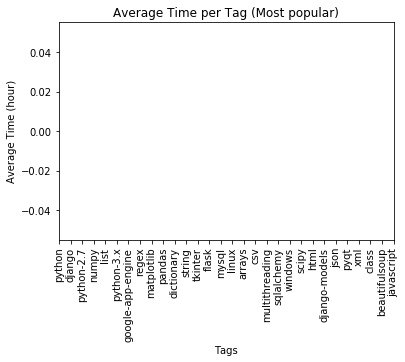

<Figure size 1440x216 with 0 Axes>

In [15]:
#Plot a bar chart for the top 30 popular tags in relation to the time it takes 
#for an answer to be posted
average_time_per_tag = average_time_per_tag.sort_values(ascending=False, by = 'Time it takes')
bar_df = popularity_per_tag.join(average_time_per_tag)
bar_df = bar_df.sort_values(ascending = False, by = 'Popularity per tag')
average_time = bar_df['Time it takes'][0:30]
bar_df = bar_df.reset_index()

tags = bar_df['index'][0:30]
plt.bar(tags,average_time, color='b', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

#Set Titles
plt.title("Average Time per Tag (Most popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")
plt.figure(figsize=(20,3))


In [16]:
bar_df.head()

,index,Popularity per tag,Tag,Time it takes
0,python,321923,NaN,NaN
1,django,35173,NaN,NaN
2,python-2.7,14644,NaN,NaN
3,numpy,11954,NaN,NaN
4,list,10283,NaN,NaN


In [17]:
#list of the 30 Highest waiting time with respect to tags
tags

0                python
1                django
2            python-2.7
3                 numpy
4                  list
5            python-3.x
6     google-app-engine
7                 regex
8            matplotlib
9                pandas
10           dictionary
11               string
12              tkinter
13                flask
14                mysql
15                linux
16               arrays
17                  csv
18       multithreading
19           sqlalchemy
20              windows
21                scipy
22                 html
23        django-models
24                 json
25                 pyqt
26                  xml
27                class
28        beautifulsoup
29           javascript
Name: index, dtype: object

(0, 5)

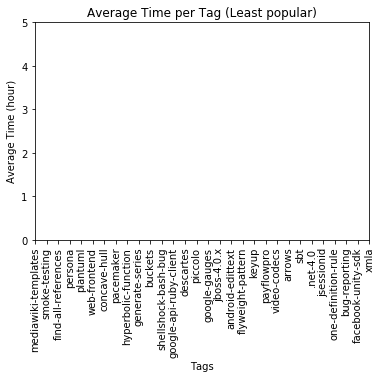

In [18]:
#Plot a bar chart for the top 30 least popular tags in relation to the time 
#it takes
bar_df = bar_df.sort_values(ascending = True, by = 'Popularity per tag')
average_time = bar_df['Time it takes'][0:30]
tags = bar_df['index'][0:30]
plt.bar(tags,average_time, color='r', alpha=0.5, align="edge")
tick_locations = [value for value in tags]
plt.xticks(tick_locations, tags, rotation="vertical")

average_time_per_tag.head(20)
#Set Titles
plt.title("Average Time per Tag (Least popular)")
plt.ylabel("Average Time (hour)")
plt.xlabel("Tags")
#plt.figure(figsize=(15,3))
plt.ylim(0,5)

In [19]:
#list of the 30 lowest waiting time with respect to tags 
tags

13069       mediawiki-templates
10497             smoke-testing
10496       find-all-references
10495                   persona
10494                  plantuml
10493              web-frontend
10492              concave-hull
10491                 pacemaker
10490       hyperbolic-function
10489           generate-series
10488                   buckets
10487       shellshock-bash-bug
10486    google-api-ruby-client
10498                 descartes
10485                   piccolo
10483             google-gauges
10482               jboss-4.0.x
10481          android-edittext
10480         flyweight-pattern
10479                     keyup
10478                payflowpro
10477              video-codecs
10476                    arrows
10475                       sbt
10474                  .net-4.0
10473                jsessionid
10472       one-definition-rule
10484             bug-reporting
10471        facebook-unity-sdk
10499                      xmla
Name: index, dtype: object

Text(0.5,1,"Average Waiting Time vs. Tags' Popularity")

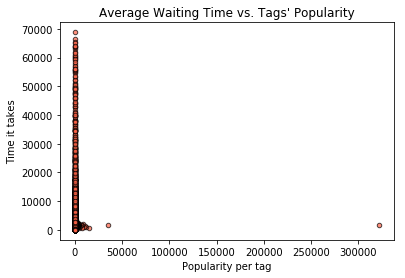

In [20]:
#Create a scatter plot of the population with independent variable: tag's popularity
#and dependent variable: average time it takes to answer
#In order to do this, I want to create a DF which contains both of these variables

popularity_per_tag_df = pd.DataFrame({
    'Popularity per tag': average_time_df['Tag'].value_counts()})
average_time_per_tag = round(average_time_df.groupby(average_time_df['Tag']).mean(),6)
joint_df = popularity_per_tag_df.join(average_time_per_tag)
scatter_df = joint_df[['Time it takes','Popularity per tag']]


#Scatter plot
scatter_df.plot.scatter(x = 'Popularity per tag',y= 'Time it takes',
                           marker="o", color="tomato",
                           alpha = 0.7, edgecolors = 'black')
plt.title("Average Waiting Time vs. Tags' Popularity")

#Original Hypothesis: The least commonly known languages take less time to answer
#Based on this graph, our original hypothesis failed since the least popular 
#tags are the ones with the highest waiting times.
#Note: With a highly skewed distribution, it is very difficult to work with 
#the old hypothesis, I'm working on our new hypothesis right now.I'll will 
#I'll update you guys if I made further progress. 

In [21]:
#Quickly check the above plot with our data frame
scatter_df = scatter_df.sort_values(ascending=False, by = 'Popularity per tag')
scatter_df = scatter_df.reset_index()

scatter_df.head()

,index,Time it takes,Popularity per tag
0,python,1714.546490,321923
1,django,1831.969893,35173
2,python-2.7,649.454735,14644
3,numpy,1172.998791,11954
4,list,1508.986889,10283


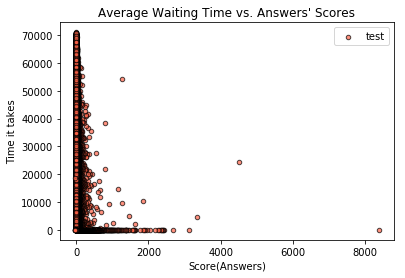

In [22]:
#New Hypothesis (FAILED): Higher Scores are associated with lower waiting time
#Independent Variable: Answers' Scores, Tag's popularity
#Scatter plot gives us an overview of the correlation between waiting time and answers' scores
score_time_df = sort_merge[['Tag', 'Score(Answers)','Time it takes']]
score_time_df = score_time_df.sort_values(ascending=False, by = 'Score(Answers)')

score_time_df.plot.scatter(x = 'Score(Answers)',y= 'Time it takes',
                           marker="o", color="tomato",label = "test",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

plt.title("Average Waiting Time vs. Answers' Scores")
score_time_df = score_time_df.rename(columns = {'Time it takes': "time_it_takes", 
                                                'Score(Answers)': 'score_answers'})


In [23]:
#Since the data point highly concentrated around 500 score mark
cut_df = sort_merge.loc[(sort_merge['Score(Answers)'] > 0)]

cut_df['Tag'].value_counts()

python                     213121
django                      23582
python-2.7                   9037
numpy                        7788
list                         6745
python-3.x                   6219
google-app-engine            5668
regex                        5320
matplotlib                   4730
pandas                       4378
dictionary                   4311
string                       4150
tkinter                      3389
flask                        2811
mysql                        2719
linux                        2633
multithreading               2547
windows                      2545
arrays                       2521
csv                          2512
sqlalchemy                   2480
html                         2324
django-models                2324
scipy                        2291
json                         2172
xml                          2071
pyqt                         2053
class                        2007
javascript                   1994
beautifulsoup 

In [24]:
cut_df.head()

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
499448,15939041,while-loop,21423620.0,2658050.0,21415934.0,2014-01-29 06:24:09,1.0,21415934.0,2822004.0,2014-01-28 20:20:16,2.0,"Using scikit-learn, how do I learn a SVM over ...",10.064722
346686,11704379,python,14635529.0,6782.0,14635427.0,2013-01-31 21:31:59,1.0,14635427.0,685834.0,2013-01-31 21:25:42,1.0,WebSocket protocol binary data endianess,0.104722
752032,21787717,ffmpeg,31714466.0,722804.0,31705950.0,2015-07-30 02:55:23,1.0,31705950.0,507430.0,2015-07-29 16:18:41,0.0,Run startup file on shell restart in Idle,10.611667
345206,11660014,pybrain,14565701.0,170431.0,14564904.0,2013-01-28 15:46:36,1.0,14564904.0,538418.0,2013-01-28 15:07:28,1.0,how to send tab-key to python subprocess's stdin,0.652222
241712,8514467,apache,9827793.0,888177.0,9827130.0,2012-03-22 17:50:59,1.0,9827130.0,1003879.0,2012-03-22 17:11:51,1.0,Using a datepicker jQuery widget in a pyramid ...,0.652222


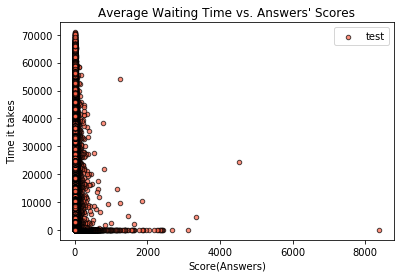

In [25]:
score_time_df = cut_df[['Tag', 'Score(Answers)','Time it takes']]
score_time_df = score_time_df.sort_values(ascending=False, by = 'Score(Answers)')

score_time_df.plot.scatter(x = 'Score(Answers)',y= 'Time it takes',
                           marker="o", color="tomato",label = "test",
                           alpha = 0.7, stacked = False, edgecolors = 'black')

plt.title("Average Waiting Time vs. Answers' Scores")
score_time_df = score_time_df.rename(columns = {'Time it takes': "time_it_takes", 
                                                'Score(Answers)': 'score_answers'})

In [26]:
#Simple Regression on Average Waiting Time and Answer's Scores
regression_model =  ols("time_it_takes ~ score_answers", data=score_time_df).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          time_it_takes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     358.4
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           6.65e-80
Time:                        16:12:54   Log-Likelihood:            -6.6261e+06
No. Observations:              652235   AIC:                         1.325e+07
Df Residuals:                  652233   BIC:                         1.325e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1391.4148      7.858    177.065      0.000    1376.013    1406.817
score_answers     5.6333      0.298     18.931      0.000       5.050       6.216
==============================================================================
Omnibus:                   701134.467   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39341900.033
Skew:                           5.690   Prob(JB):                         0.00
Kurtosis:                      39.306   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

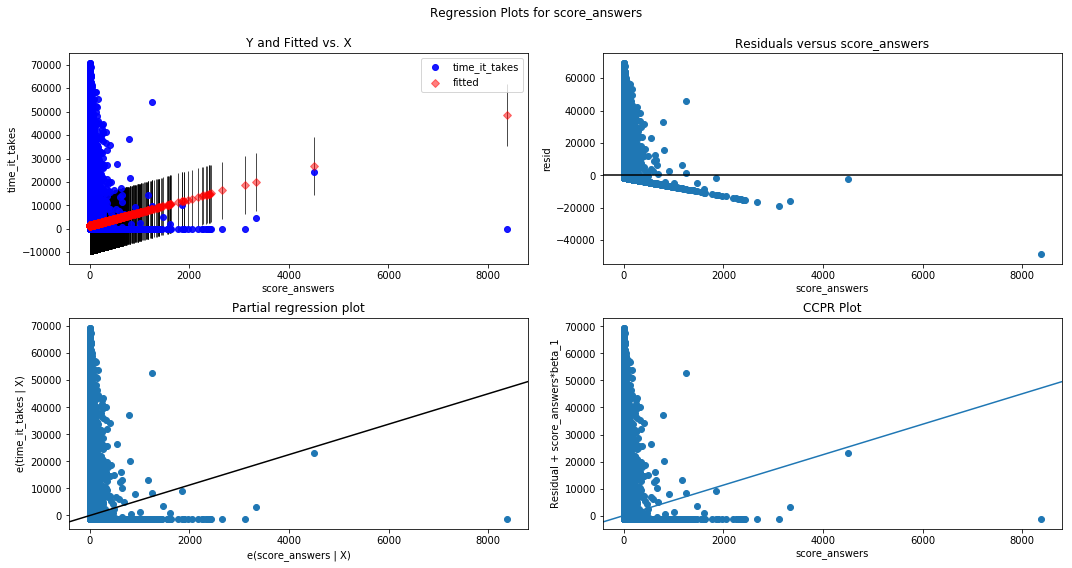

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_answers", fig=fig)

In [38]:
###New Hypothesis: Higher Question Scores are associated with higher Answers Scores
#Independent Variable: Questions' Scores, Tag's popularity
#Dependent Variable: Answers' Scores

questions_df = sort_merge[['Tag', 'Score(Questions)', 'Score(Answers)']]
questions_df = questions_df.sort_values(ascending=True, by = 'Score(Answers)')
cut_df = questions_df.loc[(questions_df['Score(Questions)'] > 0 ) & (questions_df['Score(Questions)'] <= 2000)]
cut_df['Tag'].count()

613228

Text(0.5,1,"Overall Population's Questions and Answers Scatter Plot")

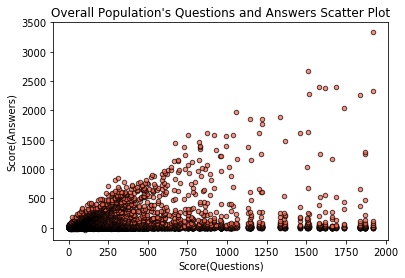

In [39]:
#Scatter plot gives us an overview of the correlation between questions' and answers' scores
cut_df.plot.scatter(x = 'Score(Questions)',y= 'Score(Answers)',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')
plt.title("Overall Population's Questions and Answers Scatter Plot")

In [30]:
cut_df = cut_df.rename(columns = {'Score(Questions)': "score_questions", 
                                                'Score(Answers)': 'score_answers'})
#Simple Regression on Questions' and Answer's Scores
regression_model =  ols("score_answers ~ score_questions", data=cut_df).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                 6.626e+04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:13:22   Log-Likelihood:            -2.8578e+06
No. Observations:              613482   AIC:                         5.716e+06
Df Residuals:                  613480   BIC:                         5.716e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0546      0.033     92.751      0.000       2.990       3.119
score_questions     0.1043      0.000    257.409      0.000       0.104       0.105
==============================================================================
Omnibus:                  2313286.638   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    7968331414262.504
Skew:                          84.451   Prob(JB):                         0.00
Kurtosis:                   17658.033   Cond. No.                         82.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

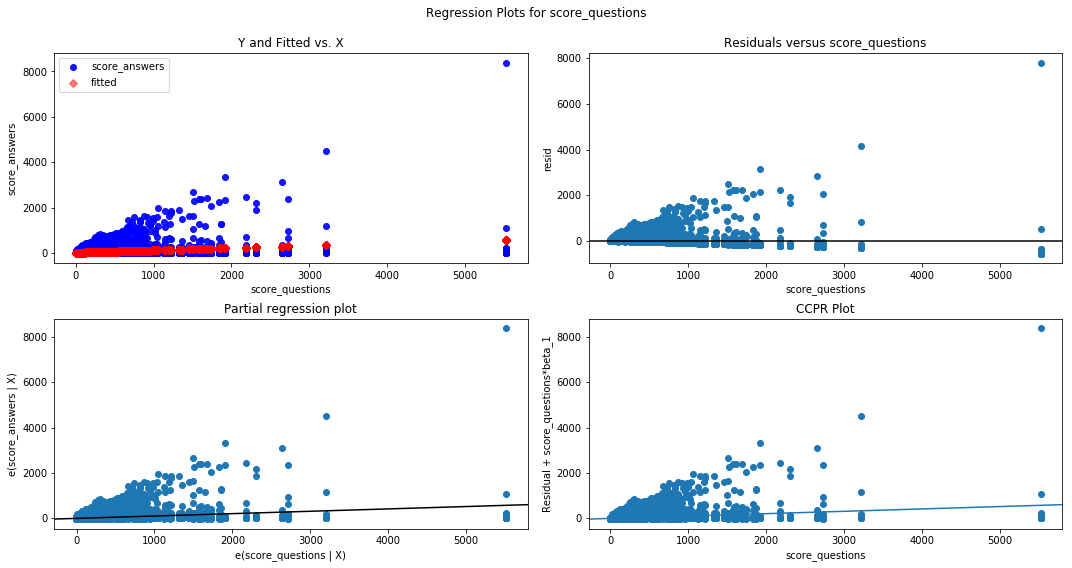

In [31]:
#filter by day, how long it has been on the internet.
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)

In [32]:
#Perform the same procedure but this time on the average Questions' and Answers' Scores
new_cut_df = round(cut_df.groupby(cut_df['Tag']).mean(),6)
#Simple Regression on Average Questions' and Answer's Scores 
new_regression_model =  ols("score_answers ~ score_questions", data=new_cut_df).fit()
new_regression_model_summary = new_regression_model.summary()
new_regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          score_answers   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     479.1
Date:                Fri, 21 Dec 2018   Prob (F-statistic):          4.72e-104
Time:                        16:13:42   Log-Likelihood:                -48298.
No. Observations:               11350   AIC:                         9.660e+04
Df Residuals:                   11348   BIC:                         9.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8843      0.162     23.931      0.000       3.566       4.202
score_questions     0.0435      0.002     21.888      0.000       0.040       0.047
==============================================================================
Omnibus:                    32968.864   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2435781000.441
Skew:                          39.953   Prob(JB):                         0.00
Kurtosis:                    2271.075   Cond. No.                         82.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

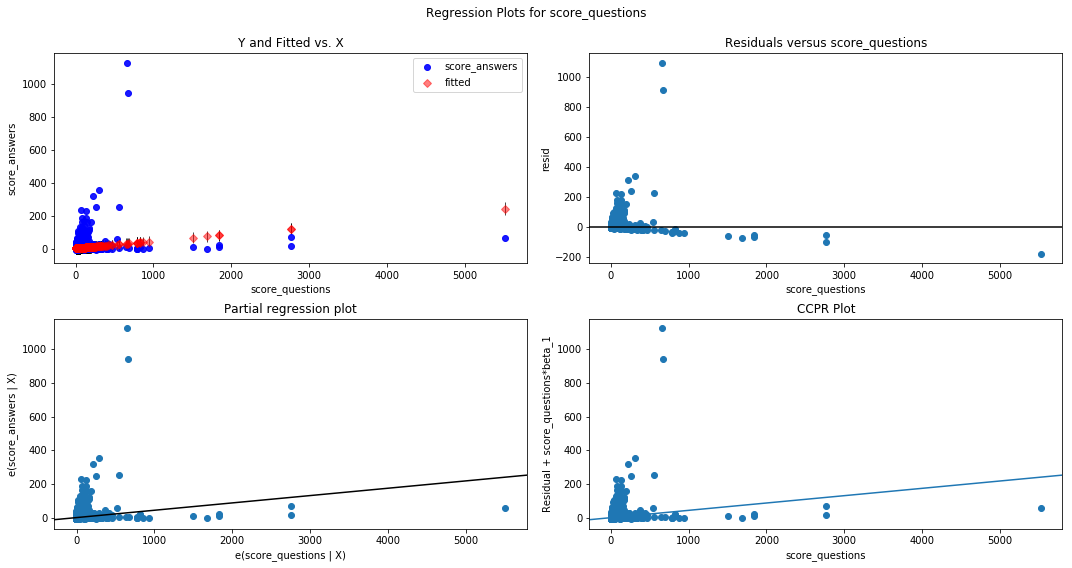

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(new_regression_model, "score_questions", fig=fig)

In [34]:
#Multiple Regression
#Independent Variable: Quesitons' Scores, Tag's popularity
#mult_regression_model = ols("""score_answers ~ score_questions + Tag""", data=new_cut_df).fit()
#mult_regression_df = 

In [32]:
#average_time_histogram = pd.DataFrame({'average_time_df': np.random.normal(size=100)})
#average_time_df.describe()
#pd.cut(np.array([-1.052941e+17, 3.810000e+11, 1.204000e+12, 7.945000e+12, 2.153771e+17]), 3)
#range = np.arange(-1.052941e+17, 2.153771e+17, 1e+15)
#plt.plot(range, norm.pdf(range,-1.052941e+17, 2.153771e+17))
#average_time_df_scatter = average_time_df.plot.kde()